# loading R 

In [1]:
%load_ext rpy2.ipython

# loading CSV file

In [2]:
import pandas as pd

df = pd.read_csv('./data/qualtrics/Topic_Item_Assessment_June+9,+2024_19.28.csv').iloc[2:].reset_index().drop(columns=['index'])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,doc5,model,topic_id,NPMI,usefulness_first,slider,slider_lower,slider_upper,neg_val_question,neg_val_text
0,2024-06-09 08:07:00,2024-06-09 08:15:58,IP Address,143.59.219.146,100,538,True,2024-06-09 08:16:00,R_7noreC9zRDpbt3H,NaN,...,Question: What political party do you normally...,stm,1,0.014207007836655,False,sixty,56,69,related_to_dataset,These words are <strong>not related </strong>t...
1,2024-06-09 08:11:29,2024-06-09 08:16:17,IP Address,69.229.225.48,100,287,True,2024-06-09 08:16:18,R_1WI3eYTiYq2QjVD,NaN,...,yall my voice is coming BACK. (consequently I ...,bertopic,13,0.0557692969744933,False,ten,6,19,clear,It is <strong>not clear</strong> why these wor...
2,2024-06-09 08:08:40,2024-06-09 08:17:54,IP Address,162.84.182.105,100,553,True,2024-06-09 08:17:55,R_12svQAkwxkOOn0E,NaN,...,"I'm not single, I'm just dating myself 💐<br><b...",stm,10,0.0508991229139362,False,ten,6,19,expect,I would<strong> not expect</strong> to see the...
3,2024-06-09 08:10:53,2024-06-09 08:18:09,IP Address,71.247.36.236,100,436,True,2024-06-09 08:18:10,R_3DU9Ad0NQQ0f5cL,NaN,...,"file under: self care, free therapy, pure happ...",scholar,5,0.1243542452021496,False,ninety,86,99,suprised_of_AI,I am <strong> not surprised </strong>that a co...
4,2024-06-09 08:10:14,2024-06-09 08:18:30,IP Address,73.124.9.207,100,495,True,2024-06-09 08:18:30,R_5QmzLLzYLbI4sqo,NaN,...,"I'm a goddess, don't get it twisted<br><br>ps-...",bertopic,12,0.1671956471462582,False,twenty,16,29,clear,It is <strong>not clear</strong> why these wor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024-06-09 12:07:38,2024-06-09 12:16:48,IP Address,35.151.28.83,100,549,True,2024-06-09 12:16:49,R_6gITpyyZN7JtUqy,NaN,...,Nothing like starting the morning off with the...,lda,4,0.1437591041642654,False,eighty,76,89,clear,It is <strong>not clear</strong> why these wor...
68,2024-06-09 12:07:40,2024-06-09 12:18:36,IP Address,158.62.134.115,100,655,True,2024-06-09 12:18:37,R_6uaZns3msFC4Kjf,NaN,...,Day 36 of inpatient was okay. I didn't sleep w...,stm,7,0.0506314854331052,False,ten,6,19,suprised_of_AI,I am <strong> not surprised </strong>that a co...
69,2024-06-09 11:37:58,2024-06-09 12:24:53,IP Address,24.118.73.114,100,2814,True,2024-06-09 12:24:54,R_15YIbFPJ7yjlpcp,NaN,...,im fuckin stressed out today. work has me extr...,stm,6,0.133606213760362,False,seventy,66,79,clear,It is <strong>not clear</strong> why these wor...
70,2024-06-09 11:47:44,2024-06-09 12:28:05,IP Address,35.147.127.40,100,2420,True,2024-06-09 12:28:06,R_1xQmbKDqL4Xjgop,NaN,...,Therapy 28.04.20 // boundaries I can't reall...,lda,3,0.0762608953437435,False,twenty,16,29,expect,I would<strong> not expect</strong> to see the...


number of data collected

In [3]:
df = df[df.prolific_id_question.str.len() > 5]
print('number of collected data: {0}'.format(len(df)))

number of collected data: 71


committment check

In [4]:
df = df[df.Commitment_question == 'Yes, I will.']
print('number of data after commitment check: {0}'.format(len(df)))

number of data after commitment check: 71


drop the ones who did not pass slider check

In [5]:
idx = []

df.set_slider_check_1 = df.set_slider_check_1.astype(int)
df.slider_upper = df.slider_upper.astype(int)
df.slider_lower = df.slider_lower.astype(int)

for i,row in df.iterrows():
    if row.set_slider_check_1>row.slider_upper or  row.set_slider_check_1<row.slider_lower:
        # print(row.set_slider_check_1,row.slider,row.slider_lower,row.slider_upper)
        idx.append(i)


df = df.drop(idx)

print('number of data after slider check: {0}'.format(len(df)))

number of data after slider check: 71


dropping the ones who timed out!

In [6]:
import datetime

idx = []

for i,row in df.iterrows():
    if (datetime.datetime.strptime(row.EndDate,'%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(row.StartDate,'%Y-%m-%d %H:%M:%S')).seconds > 3360:
        idx.append(i)

df = df.drop(idx)

print('number of data after timeout: {0}'.format(len(df)))

number of data after timeout: 71


list of people we should pay!

In [7]:
print(','.join(set(df.prolific_id_question)))

6650febe4228b362517703ee,5dd95e3c2274978e775f2aff,597763c969b5670001b6c8cf,65cd0c952501aa81d90250d1,66646209b821e70655b52198,6100dd446b99875906e4d41b,666382ae8e2b0242b661879a,662d57d09714cf1c25756326,6108781e0d1dd936d2b75432,6661e11d7c0b4b2265491e5f,65ff8d0f3dceb18d1efdac6c,614e6f4f00a9e94b123316d3,5c738c1738ff4500017ba1fd,60da51c134df429f4806381a,66184d07ef8faa6c0af4d35e,6660cf28e84fdd1b7cd8a450,56f0393f3f71990005d0e66d,66505efb53953d2da6e1a8cd,65ee381df4583f5eca71ccb6,5e7129105f07e2038154621a,663e40565034675772c712f7,66630a13a509219075157373,5862aa84db3e720001e2279b,57509ce803a9750006e311a5,645906dc264ac9eb66b7f3ec,60fab1b96bd45f60d1b053dc,66638bf6ef009fcce575a497,65cb84b39bb04db307f28ef7,5c2fd570e4dd550001e4aa9d,6610d63631a5eb4328f61c03,66622d4acbfc608af24ef17c,66520ab9072c7ee9751546b0,5faf887aa9c32221f28e240a,65e5d888a0cb1ecde877fa6a,6129d940b66000436442b65d,665890454c7a5f8b0d2416e8,66639467c7d0df666345fd10,63d85df2ce828accc88ba837,6654861d159b75308b02cfee,61006b0f1f3bfddb6b4c5d55,

negative valence and Mars Check

In [8]:
neg_val_map = {'clear':'clear_1','related_to_dataset':'related_to_corpus_1',
              'suprised_of_AI':'suprised_of_AI_1','expect':'expect_1',}


import datetime

idx = []

for i,row in df.iterrows():
    val = 100-int(row.neg_val_check_1)
    check = int(row[neg_val_map[row.neg_val_question]])
    if (check-10>val or val>check+10) and (row.mars != 'Never') :
        idx.append(i)
        # print(row.neg_val_question,row.neg_val_check_1,row[neg_val_map[row.neg_val_question]])
        # print(row.mars)


df = df.drop(idx)

print('number of data after negative valence & Mars check: {0}'.format(len(df)))

number of data after negative valence & Mars check: 71


checking data distribution

/var/folders/86/nw630jn16nsg2zqycwy774640000gn/T/ipykernel_9855/662402430.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(df.usefulness_1))


<Axes: ylabel='Density'>

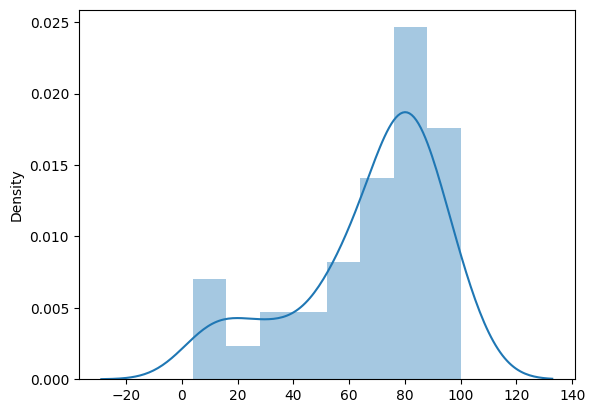

In [9]:
# df.topic_id,df.model
import seaborn as sns

sns.distplot(list(df.usefulness_1))

lets check the text input

In [9]:
# print('\n'.join(list(df.participant_criteria)))
print('\n'.join(list(df.participant_criteria.dropna())))

disgusting words with little social value
travel
Water melon
i could explain the relationship to a stranger
Relevance to context
cookie
healing
nutrition
parents 
indulge


In [12]:
import collections
# df.usefulness_1,df.usefulness_first_1
# df[["usefulness_first_1","usefulness_1","theme_representation"]].groupby("theme_representation").sum()

df.usefulness_first_1 = df.usefulness_first_1.astype(float)
df.usefulness_1 = df.usefulness_1.astype(float)
print(df[["usefulness_first_1","theme_representation"]].dropna().groupby("theme_representation").mean())
df[["usefulness_1","theme_representation"]].dropna().groupby("theme_representation").mean()

# df[df.topic_id=='11'].doc1

                                                    usefulness_first_1
theme_representation                                                  
five associated documents                                    60.166667
ten representative words                                     81.750000
ten representative words and five associated do...           71.153846


,usefulness_1
theme_representation,
five associated documents,54.8
ten representative words,77.0
ten representative words and five associated documents,66.0


In [14]:
udf = df[["usefulness_1","theme_representation"]].dropna()
udf['order'] = "last"
udf['rating'] = udf.usefulness_1

ldf = df[["usefulness_first_1","theme_representation"]].dropna()
ldf['order'] = "first"
ldf['rating'] = ldf.usefulness_first_1

use_df = pd.concat([udf,ldf])
use_df = use_df.drop(columns=["usefulness_first_1","usefulness_1"])
use_df

,theme_representation,order,rating
1,five associated documents,last,82.0
5,ten representative words,last,80.0
7,ten representative words and five associated d...,last,70.0
8,ten representative words and five associated d...,last,67.0
12,five associated documents,last,59.0
14,ten representative words,last,92.0
15,five associated documents,last,10.0
16,ten representative words,last,100.0
17,ten representative words,last,100.0
19,ten representative words,last,50.0


In [74]:
%%R -i use_df

# print(dim(use_df))
print(summary(analysis.variance <- aov(rating ~ as.factor(order) * as.factor(theme_representation),data=use_df)))
TukeyHSD(analysis.variance)

                                                 Df Sum Sq Mean Sq F value
as.factor(order)                                  1    621   621.3   1.359
as.factor(theme_representation)                   2   4642  2321.2   5.079
as.factor(order):as.factor(theme_representation)  2      1     0.5   0.001
Residuals                                        54  24680   457.0        
                                                  Pr(>F)   
as.factor(order)                                 0.24877   
as.factor(theme_representation)                  0.00953 **
as.factor(order):as.factor(theme_representation) 0.99895   
Residuals                                                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rating ~ as.factor(order) * as.factor(theme_representation), data = use_df)

$`as.factor(order)`
                diff       lwr      upr     p adj
last-first -6.43

In [16]:
grp_df = use_df
grp_df['group'] = [str(i)+'-'+str(j) for i,j in zip(use_df.theme_representation,use_df.order)]

{'five associated documents-first',
 'five associated documents-last',
 'ten representative words and five associated documents-first',
 'ten representative words and five associated documents-last',
 'ten representative words-first',
 'ten representative words-last'}

In [78]:
%%R -i grp_df

# print(dim(grp_df$value))
group_mean<- aggregate(x= grp_df$rating,by = list(grp_df$group),FUN = mean)
print(var(group_mean))#between group variance

s <- 0
vals = c()
for (i in 1:60)
{
    v <- (grp_df$rating[i] - group_mean[group_mean$Group.1 == grp_df$group[i],"x"])^2
    s <- s + v
    
    # vals[i] <- v
}
print(s/60)
# print(var(vals))
# rownames(group_mean) <- group_mean$Group.1
# print(group_mean)

# gaov = aov(rating~group,data=grp_df)
# grandmean = as.vector(gaov$"(Intercept)"[[1]][1])
# within = summary(gaov)$"Error: Within"[[1]]$"Mean Sq" 
# dfRun = summary(gaov)$"Error: Run"[[1]]$"Df"
# dfWithin = summary(gaov)$"Error: Within"[[1]]$"Df"
# Run = summary(gaov)$"Error: Run"[[1]]$"Mean Sq"
# between = (Run-within)/((dfWithin/(dfRun+1))+1)
# print(c('between: ',between,as.vector(gaov$"(Intercept)"[[1]][1])))
# print(ls(gaov))

between <- 103.6474
within <- 411.3396

power.anova.test(groups = 6, between.var = between, within.var = within,power = .80,sig.level=0.05)

# print(summary(analysis.variance <- aov(rating ~ as.factor(group),data=grp_df)))
# print(TukeyHSD(analysis.variance))

        Group.1        x
Group.1      NA       NA
x            NA 103.6474
[1] 411.3396

     Balanced one-way analysis of variance power calculation 

         groups = 6
              n = 11.14112
    between.var = 103.6474
     within.var = 411.3396
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group



In addition: Warning message:
In var(group_mean) : NAs introduced by coercion


# n_factors

In [34]:
tdf = df[['distinct_1', 'imagine_1', 'expect_1', 'unusual_1', 'clear_1', 'unrelated_1', 'coherent_1', 'offensive_1', 'meaningful_1', 'arbitrary_1', 'specific_perspective_1', 'confusing_1', 'one_theme_1', 'strange_1', 'general_theme_1', 'could_offend_1', 'easy_label_1', 'insight_1', 'one_randomly_added_1', 'new_way_of_thinking_1', 'neg_val_check_1', 'more_information_1', 'prefer_differently_1', 'agree_1', 'different_themes_1', 'specific_theme_1', 'do_not_fit_1', 'curious_to_know_more_1', 'emotion_1', 'label_consensus_1', 'missing_1', 'important_1', 'two_plus_random_1', 'sensible_1', 'biased_1', 'label_confident_1', 'related_to_corpus_1', 'influence_thinking_1']]
for col in tdf.columns:
    tdf.loc[:,col] = pd.to_numeric(tdf[col])
# list(df.columns)
# set(df.theme_representation)

In [10]:
%%R

library(EGAnet)
library(nFactors)
library(parameters)


EGAnet (version 1.2.3) 
For help getting started, type browseVignettes("EGAnet")
 
For bugs and errors, submit an issue to <https://github.com/hfgolino/EGAnet/issues>
Loading required package: lattice

Attaching package: ‘nFactors’

The following object is masked from ‘package:lattice’:

    parallel



In [37]:
%%R -i tdf

# result <- n_factors(tdf, type = "FA",  rotation = "oblimin",  algorithm = "minres",  package = c('EGAnet','psych','nFactors','fit','PCDimension'))
result <- n_factors(tdf, type = "FA",  rotation = "varimax",  algorithm = "minres",  package = c('EGAnet','psych','nFactors','fit','PCDimension'))
print(summary(result))
as.data.frame(result)

   n_Factors n_Methods
1          1         1
2          2         1
3          3         2
4          4         2
5          7         1
6          8         4
7         16         1
8         17         2
9         18         1
10        20         1
11        25         1
12        28         2
13        30         1
14        34         1
15        36         1
   n_Factors              Method              Family
1          1 Acceleration factor               Scree
2          2                 BIC                 Fit
3          3                 CNG                 CNG
4          3          Scree (R2)            Scree_SE
5          4                beta Multiple_regression
6          4          EGA (TMFG)                 EGA
7          7             Fit_off                 Fit
8          8 Optimal coordinates               Scree
9          8   Parallel analysis               Scree
10         8    Kaiser criterion               Scree
11         8        EGA (glasso)                 

Factor Analysis using method =  minres
Call: fa(r = tdf, nfactors = 4, rotate = "varimax", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
                         MR1   MR2   MR4   MR3   h2    u2 com
distinct_1              0.35  0.36  0.10 -0.19 0.30 0.703 2.7
imagine_1               0.87  0.04  0.04  0.24 0.81 0.187 1.2
expect_1               -0.76  0.17  0.24 -0.21 0.71 0.289 1.5
unusual_1               0.89  0.06 -0.03  0.17 0.83 0.167 1.1
clear_1                -0.80  0.15  0.32 -0.24 0.82 0.179 1.6
unrelated_1             0.89 -0.18 -0.12  0.18 0.87 0.133 1.2
coherent_1             -0.76  0.24  0.30 -0.18 0.76 0.243 1.7
offensive_1             0.48 -0.05  0.06  0.53 0.52 0.477 2.0
meaningful_1           -0.54  0.46  0.15 -0.38 0.67 0.328 3.0
arbitrary_1             0.68  0.16 -0.07  0.18 0.53 0.474 1.3
specific_perspective_1 -0.19  0.65  0.19  0.04 0.49 0.505 1.4
confusing_1             0.81 -0.06 -0.24  0.26 0.78 0.222 1.4
one_theme_1        

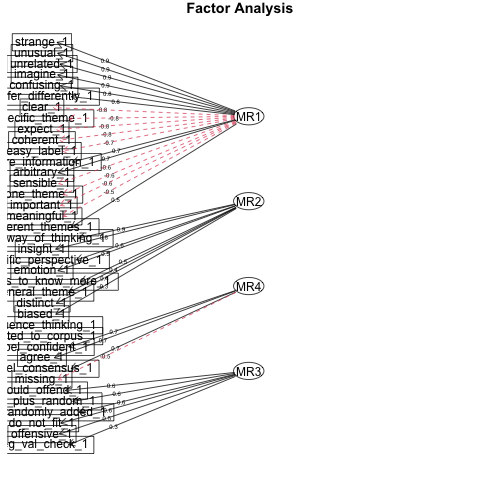

In [42]:
%%R -i tdf

library(psych) #loading fa (Factor Analysis library)
library(GPArotation)



efa.model <- fa(tdf,nfactors = 4,fm='minres',rotate='varimax')
diagram(efa.model)
efa.model